In [1]:
'''
1. Grafico a barre orizzontali che mostra corsi per livello (es. "All Levels", "Intermediate Level"...).
2. Grafico a barre verticali che mostra corsi per livello e materia (es. "Web Development", "Graphic Design"...).
3. Grafico a torta che mostra percentuali totoli del numero di corsi gratuiti vs pagamento.
4. Grafico a barre verticali che mostra il numero di corsi gratuiti e a pagamento per ogni materia.
5. Istogramma che mostra la distribuzione dei prezzi dei corsi.
6. Grafico a barre verticali che mostra la distribuzione della media del numero di lezioni per livello.
'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

df = pd.read_csv('udemy_online_education_courses_dataset.csv')

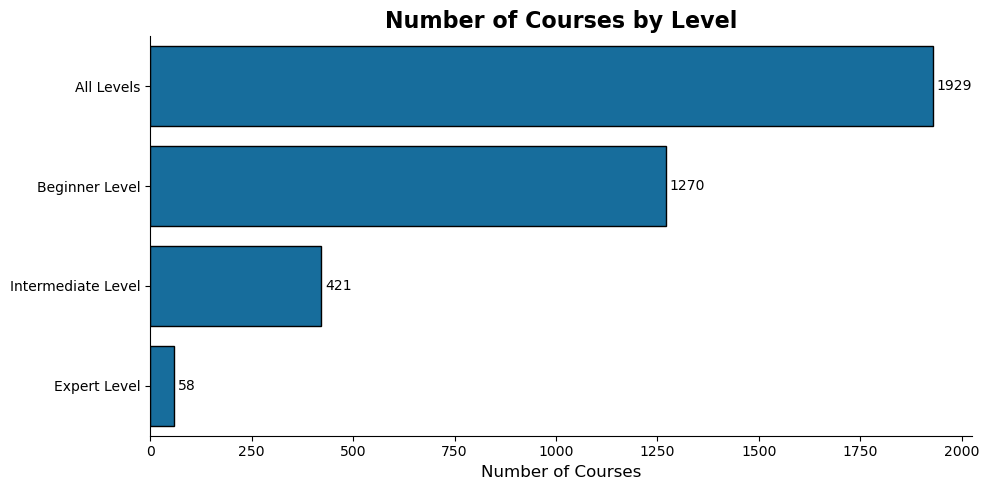

In [2]:
# 1. Distribuzione dei corsi per livello - Grafico a barre orizzontali
def bar_plot_course_distribution_by_level(data):

    plt.figure(figsize=(10, 5))
    level_counts = data['level'].value_counts().reset_index(name='counts')
    color = sns.color_palette('colorblind', n_colors=1)[0]
    
    # Grafico a barre orizzontali
    ax = sns.barplot(data=level_counts, x='counts', y='level', color=color, edgecolor='black')
    sns.despine()
    
    padding = max(level_counts['counts']) * 0.005
    for i, count in enumerate(level_counts['counts']):
        ax.text(count + padding, i, f'{count}', ha='left', va='center', fontsize=10)
    
    plt.title('Number of Courses by Level', fontsize=16, fontweight='bold', loc='Center')
    plt.xlabel('Number of Courses', fontsize=12)
    plt.ylabel('')
     
    plt.tight_layout()
    plt.savefig('Number of Courses by Level.png')
    plt.show()

bar_plot_course_distribution_by_level(df)

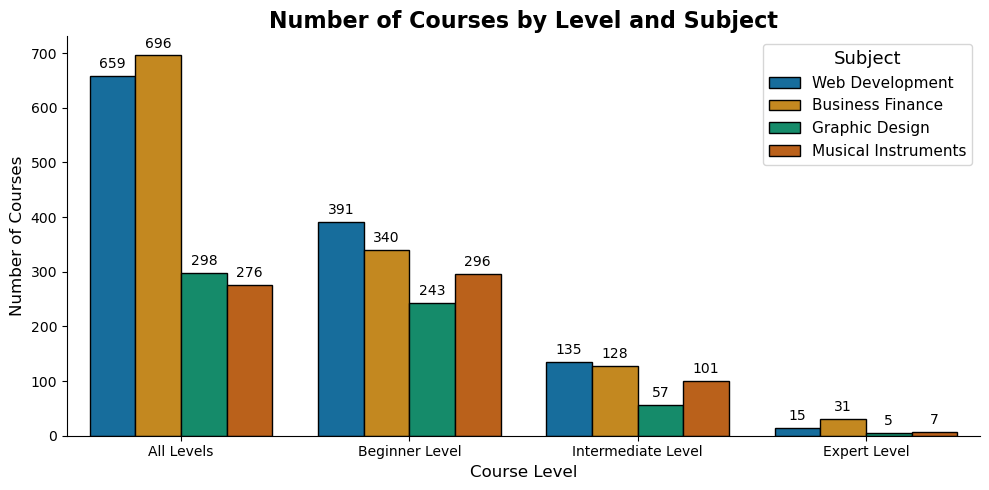

In [3]:
# 2. Distribuzione dei corsi per livello e materia - Grafico a barre verticali
def bar_plot_course_distribution_by_level_And_Subject(data):
    
    plt.figure(figsize=(10, 5))
    course_counts = df.groupby(['level', 'subject']).size().reset_index(name='counts')

    level_order = ['All Levels','Beginner Level', 'Intermediate Level', 'Expert Level']
    subject_order = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']

    # Grafico a barre verticale
    ax = sns.barplot(data=course_counts, x='level', y='counts', hue='subject', hue_order=subject_order, 
                     palette='colorblind', edgecolor='black', order=level_order)
    sns.despine()
    
    padding = max(course_counts['counts']) * 0.005
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=padding)
    
    plt.title('Number of Courses by Level and Subject', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Course Level', fontsize=12)
    plt.ylabel('Number of Courses', fontsize=12) 
    plt.legend(title='Subject', title_fontsize=13, fontsize=11)
    
    plt.tight_layout()
    plt.savefig('Number of Courses by Level and Subject.png')
    plt.show()

bar_plot_course_distribution_by_level_And_Subject(df)

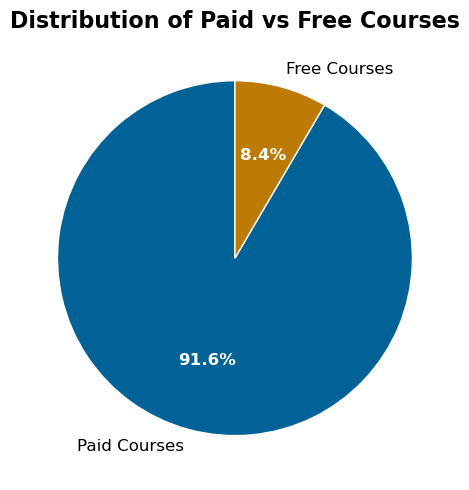

In [4]:
# 3. Analisi dei corsi gratuiti vs a pagamento - Grafico a torta
def pie_plot_paid_vs_free_courses_pie(data):

    plt.figure(figsize=(10, 5))
    paid_counts = data['is_paid'].value_counts(normalize=True) * 100
    
    labels = ['Paid Courses', 'Free Courses']
    colors = sns.color_palette('colorblind')

    reduced_saturation_colors = [mcolors.to_rgba(c, alpha=1) for c in colors]
    reduced_saturation_colors = [(r*0.85, g*0.85, b*0.85, a) for r, g, b, a in reduced_saturation_colors]

    # Grafico a torta
    wedges, texts, autotexts = plt.pie(
        paid_counts, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=reduced_saturation_colors,
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}
    )

    for autotext in autotexts:
        autotext.set_color('white')  # Percentuali in bianco
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
    
    plt.title('Distribution of Paid vs Free Courses', fontsize=16, fontweight='bold', loc='center')
    
    plt.tight_layout()
    plt.savefig('Distribution of Paid vs Free Courses.png')
    plt.show()

pie_plot_paid_vs_free_courses_pie(df)

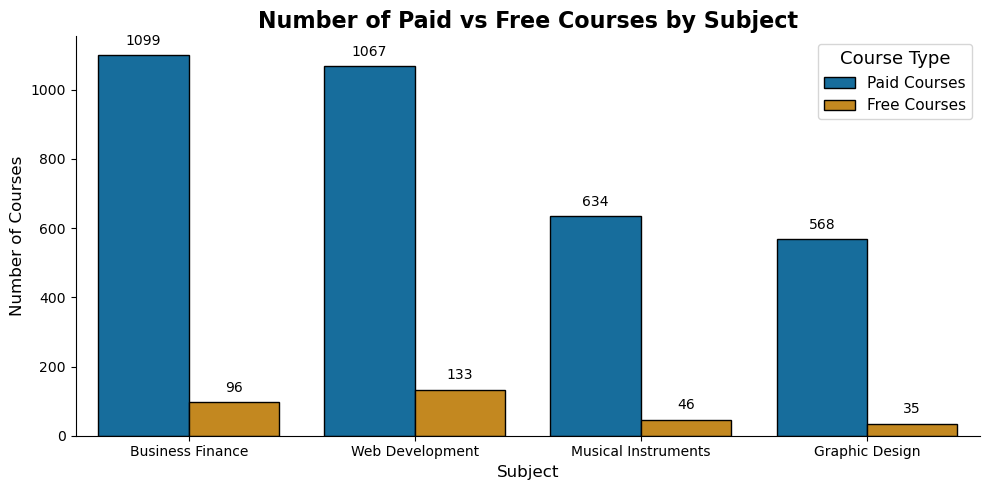

In [5]:
# 4. confronta il numero di corsi gratuiti e a pagamento per ogni materia - Grafico a barre verticali
def bar_plot_paid_vs_free_courses_by_subject(data):
    
    plt.figure(figsize=(10, 5))
    sorted_subjects = data[data['is_paid']].groupby('subject').size().sort_values(ascending=False).index.tolist()
    course_counts = data.groupby(['subject', 'is_paid']).size().reset_index(name='counts')

    course_counts['is_paid'] = course_counts['is_paid'].map({True: 'Paid', False: 'Free'})
    course_counts['subject'] = pd.Categorical(course_counts['subject'], categories=sorted_subjects, ordered=True)
    course_counts = course_counts.sort_values(by=['subject', 'is_paid'], ascending=[True, False])
    
    # Grafico a barre verticale
    ax = sns.barplot(data=course_counts, x='subject', y='counts', hue='is_paid', palette='colorblind', edgecolor='black', order=sorted_subjects)
    sns.despine()

    padding = max(course_counts['counts']) * 0.005
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=padding)
    
    plt.title('Number of Paid vs Free Courses by Subject', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Subject', fontsize=12)
    plt.ylabel('Number of Courses', fontsize=12)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['Free Courses' if label == 'Free' else 'Paid Courses' for label in labels]
    plt.legend(handles, labels, title='Course Type', title_fontsize=13, fontsize=11)
    
    plt.tight_layout()
    plt.savefig('Number of Paid vs Free Courses by Subject.png')
    plt.show()

bar_plot_paid_vs_free_courses_by_subject(df)

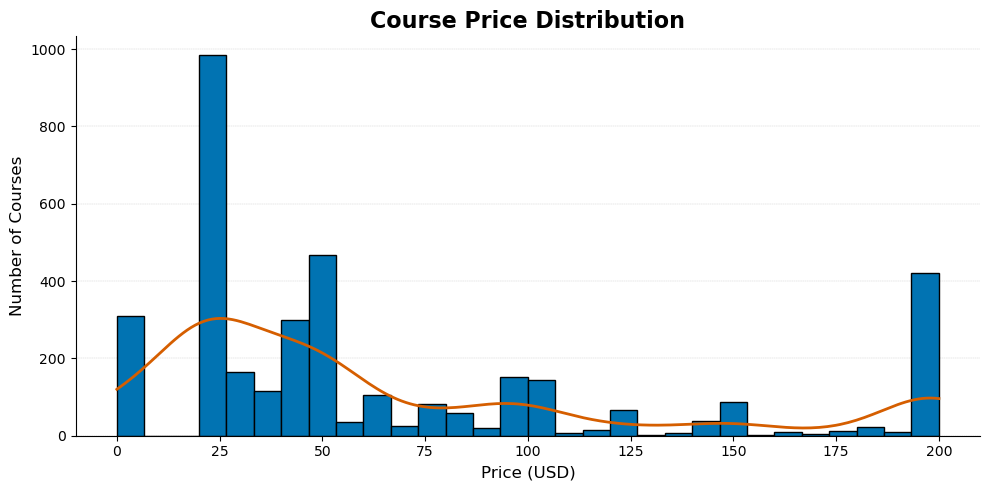

In [6]:
# 5. Distribuzione dei prezzi - Istrogramma con kde(kernel density estimation)
def histo_plot_price_distribution(data):
    
    plt.figure(figsize=(10, 5))

    color = sns.color_palette('colorblind')[0]

    plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0.7, zorder=0)
    
    # Istogramma + KDE
    sns.histplot(data['price'], bins=30, kde=True, color=color, alpha=1, zorder=2)
    sns.despine()

    ax = plt.gca() 
    kde_line = ax.lines[0]
    kde_line.set_color(sns.color_palette('colorblind')[3])
    kde_line.set_linewidth(2)

    plt.title('Course Price Distribution', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Price (USD)', fontsize=12)
    plt.ylabel('Number of Courses', fontsize=12)

    plt.tight_layout()
    plt.savefig('Course Price Distribution.png')
    plt.show()

histo_plot_price_distribution(df)

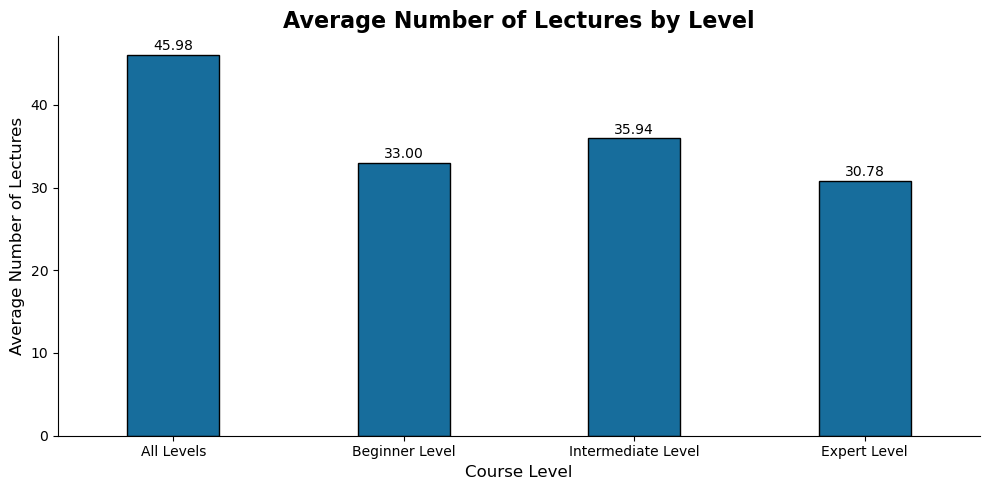

In [7]:
# 6. Distribuzione della media del numero di lezioni per livello - Grafico a barre verticale
def bar_plot_Average_Number_of_Lectures_by_level(data):

    plt.figure(figsize=(10, 5))
    average_counts = data.groupby('level')['num_lectures'].mean().reset_index(name='Average Number of Lectures')
    
    level_order = ['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level']

    average_counts['level'] = pd.Categorical(average_counts['level'], categories=level_order, ordered=True)
    average_counts = average_counts.sort_values('level')

    color = sns.color_palette('colorblind', n_colors=1)[0]
    
    # Grafico a barre verticale
    ax = sns.barplot(data=average_counts, x='level', y='Average Number of Lectures', color=color, edgecolor='black', order=level_order, width=0.4)
    sns.despine()
    
    padding = max(average_counts['Average Number of Lectures']) * 0.005
    for i, count in enumerate(average_counts['Average Number of Lectures']):
        ax.text(i, count + padding, f'{count:.2f}', ha='center', va='bottom', fontsize=10)
   
    ax.set_title('Average Number of Lectures by Level', fontsize=16, fontweight='bold', loc='center')
    ax.set_xlabel('Course Level', fontsize=12)
    ax.set_ylabel('Average Number of Lectures', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('Average Number of Lectures by Level.png')
    plt.show()

bar_plot_Average_Number_of_Lectures_by_level(df)